# 0 Load libraries

In [1]:
# Import libraries
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.classify import MaxentClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from nltk.stem import WordNetLemmatizer
from keras.layers import Dense, Flatten
from keras.models import Sequential
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from urllib import request
import scipy.linalg as la
import nltk.classify.util
from sklearn import svm
import pandas as pd
import numpy as np
import warnings
import string
import time
import nltk
import re

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels as sm
import os
import graphviz

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1
Fit a logistic regression model to the mushrooms dataset from the UCI data repository using 10-fold cross-validation. Next, fit a (Bernoulli) Naïve Bayes model to the same dataset using the same criteria.  First, report the average accuracy scores for each type of
 
Next, generate aggregate contingency tables for each type of classifier.
 
Which type of classifier would you use when trying to decide if you want to eat a mushroom? Why?


In [ ]:
path = "/content/drive/My Drive/EMSE6575/mushrooms.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mushroom_quality          8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalkshape                8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [ ]:
df.head()

,Mushroom_quality,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
# change letters into numbers
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for col in df.columns:
  df[col] = encoder.fit_transform(df[col])

df.head(5)

,Mushroom_quality,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
# logistic regression model using 10 fold cross-validation
X = df.drop(['Mushroom_quality'], axis=1).values

In [ ]:
X.shape

(8124, 22)

In [ ]:
X

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [ ]:
y = df['Mushroom_quality'].values

In [ ]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.84968241, -1.48024845, -0.98168817, ..., -0.67578594,
         1.07356278, -0.87493398],
       [ 1.03211117, -1.48024845, -0.58894074, ..., -0.67578594,
         0.28123706, -0.87493398],
       [ 1.03211117, -1.48024845, -0.98168817, ..., -0.2559842 ,
         1.07356278, -0.87493398],
       ...,
       [-0.84968241,  0.95683332, -0.19619332, ..., -0.2559842 ,
         1.07356278,  1.45266409],
       [-0.22241788,  0.14447273, -0.98168817, ...,  1.42322278,
         0.28123706,  1.45266409],
       [-0.22241788, -1.48024845, -0.58894074, ...,  1.42322278,
        -1.30341439, -0.29303446]])

In [ ]:
X_test

array([[-0.84968241, -1.48024845, -0.19619332, ..., -0.2559842 ,
        -0.51108867, -0.29303446],
       [-0.84968241,  0.14447273, -0.98168817, ...,  1.42322278,
         0.28123706,  0.28886506],
       [ 1.03211117,  0.95683332, -0.19619332, ...,  1.42322278,
         0.28123706,  0.28886506],
       ...,
       [ 1.03211117, -1.48024845, -0.19619332, ..., -0.67578594,
         1.07356278, -0.87493398],
       [ 1.03211117,  0.95683332,  0.98204895, ..., -1.09558769,
         0.28123706, -0.87493398],
       [-0.84968241, -1.48024845, -0.19619332, ..., -0.2559842 ,
         1.07356278, -0.87493398]])

In [ ]:
# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)

print ("Accuracy of Logistic Regression is %f" %accuracy)

Accuracy of Logistic Regression is 0.952630


In [ ]:
# fit a (Bernoulli) Naïve Bayes model to the same dataset using the same criteria

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.61%


In [ ]:
print("As logistic regression modeling has higher accuracy than naive bayes modeling, I will use logistic regression for Mushroom prediction.")

As logistic regression modeling has higher accuracy than naive bayes modeling, I will use logistic regression for Mushroom prediction.


# 2

Do the example assignment in Chapter 6 of the NLTK book: http://www.nltk.org/book/ch06.html
a. 	Develop a Naïve Bayes classifier that can determine the likely gender of a given name, including at least four features using a training set consisting of 500 randomly-selected samples. List the top 10 features for this classifier along with their corresponding odds ratios. Also indicate the accuracy of this classifier on the test set:

In [2]:
def gender_features(word):
     return {'last_letter': word[-1]}
gender_features('Shrek')

{'last_letter': 'k'}

In [20]:
from nltk.corpus import names
import random

In [21]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

LookupError: ignored

In [16]:
import random
random.shuffle(labeled_names)

NameError: ignored

In [17]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

NameError: ignored

In [ ]:
classifier.classify(gender_features('Neo'))
classifier.classify(gender_features('Trinity'))

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

In [ ]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

In [ ]:
gender_features2('John')

In [ ]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
train_names = labeled_names[1500:]
>>> devtest_names = labeled_names[500:1500]
>>> test_names = labeled_names[:500]

In [ ]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
>>> devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
>>> test_set = [(gender_features(n), gender) for (n, gender) in test_names]
>>> classifier = nltk.NaiveBayesClassifier.train(train_set) [1]
>>> print(nltk.classify.accuracy(classifier, devtest_set))

In [ ]:
errors = []
>>> for (name, tag) in devtest_names:
...     guess = classifier.classify(gender_features(name))
...     if guess != tag:
...         errors.append( (tag, guess, name) )

In [ ]:
for (tag, guess, name) in sorted(errors):
...     print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

In [15]:
def gender_features(word):
     return {'suffix1': word[-1:],
             'suffix2': word[-2:]}

In [ ]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

b.Determine the accuracy of this classifier for all of the students in this course.

In [ ]:
# develop naive bayes classifier - determine likely gender of a given name 500 randomly selected samples
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

c. 	Fit a logistic regression model to the same dataset using the same features. Which one performs better? Why?

In [ ]:
# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)

print ("Accuracy of Logistic Regression is %f" %accuracy)

Accuracy of Logistic Regression is 0.952630


# 3

Fit several logistic regression models and (Gaussian) naïve Bayes models to the Pima diabetes dataset from the UCI machine learning repository, varying training set size from 10 to 500 in units of 10. Create a plot comparing how average accuracy from each type model varies with training set size. When does each model perform better and why?

In [ ]:
path = "/content/drive/My Drive/EMSE6575/diabetes.csv"
df3 = pd.read_csv(path)

In [ ]:
df3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Preparing for modeling
df3_new = df3[(df3["Glucose"]!=0) & (df3["BloodPressure"]!=0) & (df3["BMI"]!=0)]

print("Size of df3 new:", df3_new.shape)
df3_new.head()

Size of df3 new: (724, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df3_new.describe().loc["min"]

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                0.000
Insulin                      0.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df3_lr = df3_new[df3_new["SkinThickness"]!=0]
df3_lr2 = df3_new[df3_new["SkinThickness"]==0]

linreg = LinearRegression()


linreg.fit(df3_lr.drop(["SkinThickness", "Outcome"], axis=1), df3_lr["SkinThickness"])

df3_lr2["SkinThickness"] = linreg.predict(df3_lr2.drop(["SkinThickness","Outcome"], axis=1))

df3_lr = df3_lr.append(df3_lr2)
df3_lr.describe()

<ipython-input-64-55f5dc2e4e6a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_lr2["SkinThickness"] = linreg.predict(df3_lr2.drop(["SkinThickness","Outcome"], axis=1))
<ipython-input-64-55f5dc2e4e6a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3_lr = df3_lr.append(df3_lr2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.024005,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.683955,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.014105,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,35.004675,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# train and test

X = df3_lr.drop(["Outcome"], axis=1)
y = df3_lr["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Size of x_train: (579, 8) 	 Size of x_test: (145, 8) 
Size of y_train: (579,) 	 Size of y_test: (145,)


In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

### Transform the test set
X_test = scaler.transform(X_test)

In [ ]:
# logistic test size 0.2
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)

print ("Accuracy of Logistic Regression is %f" %accuracy)

Accuracy of Logistic Regression is 0.806897


In [ ]:
# naive bayes test size 0.2
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}".format(nb.score(X_test, y_test)))

Test Accuracy: 0.7724137931034483


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train2)

X_train2 = scaler.transform(X_train2)

### Transform the test set
X_test2 = scaler.transform(X_test2)

In [ ]:
# logistic test size 0.2
classifier = LogisticRegression()
classifier.fit(X_train2, y_train2)

prediction = classifier.predict(X_test2)

In [ ]:
accuracy = accuracy_score(y_test2, prediction)

print ("Accuracy of Logistic Regression is %f" %accuracy)

Accuracy of Logistic Regression is 0.798165


In [ ]:
# naive bayes test size 0.2
nb = GaussianNB()
nb.fit(X_train2, y_train2)
print("Test Accuracy: {}".format(nb.score(X_test2, y_test2)))

Test Accuracy: 0.7798165137614679


In [ ]:
print ("Accuracy of Logistic Regression is little bit lower when test size decrease into 0.3 to 0.2, while, Naive Bayes increase little bit accuracy when the test size decreased. This indicates both modeling does not have much affection from test size to the prediction. ")

Accuracy of Logistic Regression is little bit lower when test size decrease into 0.3 to 0.2, while, Naive Bayes increase little bit accuracy when the test size decreased. This indicates both modeling does not have much affection from test size to the prediction. 


# 4
Using data from the US Social Security Administration (https://www.ssa.gov/oact/babynames/limits.html), develop a gender classifier using only full names as features.  Compare the classifier from #2 to this classifier. What does these new classifiers predict for the list of students in this course (for simplicity, assume that undergraduate students in this course were born in 1995, and graduate students were born in 1985)?


What do the classifiers predict for the gender of the names “Dylan”, “Madison”, “Tyler”, and “Dana”, assuming that they are 21 and 30 years old, and assuming that they were born in 2015?


In [27]:
pip install matplotlib==2.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-2.2.4-cp39-cp39-linux_x86_64.whl size=11633809 sha256=5a90257604cca6231c4affc9bcda18a584096fb9d3ce32c89e72e571f063beb0
  Stored in directory: /root/.cache/pip/wheels/df/97/86/c6ffbae1eb468ca9cda770ba9f24cc67cbd154205c81ab5468
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.12.2 requires matplotlib!=3.6.1,>=3.1, but you have matplotlib 2.2.4 which is incompatible.
plotnine 0.10.1 requires ma

In [30]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import requests
from bs4 import BeautifulSoup
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
mlp.rcParams.update({'font.family': "Open Sans", 'font.size' : 16})

In [39]:
path = "/content/drive/My Drive/EMSE6575/NationalNames.csv"
df = pd.read_csv(path)

FileNotFoundError: ignored

In [ ]:
print('Shape: ', df.shape)
print('Number of Uniques: ', df['Name'].nunique())
print('Sum of Null Values "Name" Col : ', df['Name'].isnull().sum())
print('Sum of Null Values "Gender" Col : ', df['Gender'].isnull().sum())

In [ ]:
df.isnull().values.any()

In [ ]:
data['Gender'] = data['Gender'].astype('category').cat.codes

# We will take unique "Name" using group by & mean of "Gender".
df = data.groupby('Name').mean()['Gender'].reset_index()

# "Gender" to int type
df['Gender'] = df['Gender'].astype('int')

# Now instead of passing sentence we will pass character from each word to model
# We required unique words of Alphabhet (A-Z : 26 words)
import string

letters = list(string.ascii_lowercase)

# Creating Vocabulary (zip: label encode to a-z -> 1-26)
vocab = dict(zip(letters, range(1,27)))

# Creating Reverse Vocabulary (zip: label encode to 1-26 -> a-z)
# i.e. To decode what we have predicted
r_vocab = dict(zip(range(1,27), letters))

In [ ]:
for i in range(0,df.shape[0]):
    seq = [ vocab[letter.lower()] for letter in df['Name'][i] ]
    df['Name'][i] = seq

In [ ]:
# Checking name with max length
X = df['Name'].values 
Y = df['Gender'].values
name_length = [ len(X[i]) for i in range(0,X.shape[0]) ]

plt.hist(name_length, bins=20)
plt.show()
# Max numbers of names with length = 6
# Below graph display that few names having length >= 12

# Padding sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=10, padding='pre')

In [ ]:
name = “Dylan” # Predicted value:  [[0.7059237]] (Male)
name = “Madison” # Predicted value:  [[0.40164128]] (Female)
name = “Tyler” # Predicted value:  [[0.5575101]] (Male)
name = “Dana” # Predicted value:  [[0.01665959]] (Female)

test_name = name.lower()
seq = [ vocab[letter] for letter in test_name ]

X_test = pad_sequences([seq], 10)
print("Test value: ", X_test)

y_pred = model.predict(X_test)
print("Predicted value: ", y_pred)
# tell that probabilty of Male or Female

if y_pred < 0.5:
    print("Female")
else:
    print("Male")

Assume LaPlacian smoothing for this problem. (HINT: coding your own algorithm may be faster!)

# 5
Do the tutorial at http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
a. 	Explain the “curse of dimensionality” in your own words and describe how this problem is addressed by
                                           	i. 	k-Nearest-Neighbor
                                         	ii. 	MaxEnt
                                       	iii. 	Naïve Bayes, and
                                        	iv. 	Support Vector classifiers

In [ ]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [ ]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
KNeighborsClassifier()
knn.predict(iris_X_test)
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_) 

# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test)

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


0.585085427447195

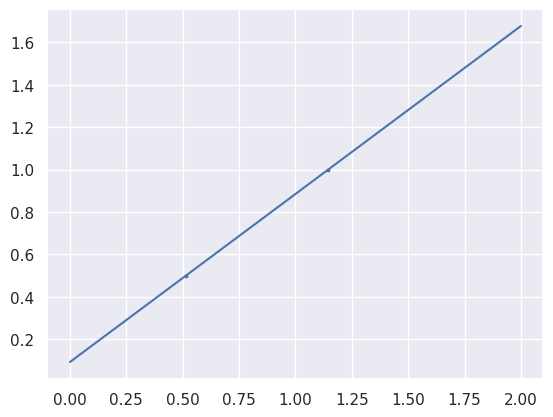

In [ ]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
  this_X = .1 * np.random.normal(size=(2, 1)) + X
regr.fit(this_X, y)
plt.plot(test, regr.predict(test))
plt.scatter(this_X, y, s=3)

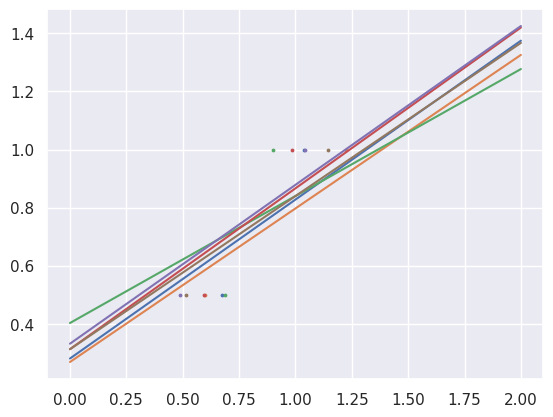

In [ ]:
regr = linear_model.Ridge(alpha=.1)

plt.figure()

np.random.seed(0)
for _ in range(6):
     this_X = .1 * np.random.normal(size=(2, 1)) + X
     regr.fit(this_X, y)
     plt.plot(test, regr.predict(test))
     plt.scatter(this_X, y, s=3)

In [ ]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
            .fit(diabetes_X_train, diabetes_y_train)
            .score(diabetes_X_test, diabetes_y_test)
        for alpha in alphas])

[0.5851211547549663, 0.5852172781570948, 0.5854773661274463, 0.5855599854998634, 0.583079520872396, 0.5705970628037382]


In [ ]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
               .fit(diabetes_X_train, diabetes_y_train)
               .score(diabetes_X_test, diabetes_y_test)
           for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[   0.         -212.4341158   517.20105983  313.77231942 -160.82780155
   -0.         -187.19532359   69.38062294  508.65764425   71.8438046 ]


In [ ]:
# Classification
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

In [ ]:
# SVM
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

In [ ]:
# Linear Kernel
svc = svm.SVC(kernel='linear')

In [ ]:
# Polynomial kernel
svc = svm.SVC(kernel='poly', degree=3)

In [ ]:
# RBF
svc = svm.SVC(kernel='rbf')

In [ ]:
# Explain the “curse of dimensionality” in your own words and describe how this problem is addressed by
# k-Nearest-Neighbor ii. MaxEnt iii. Naïve Bayes, and iv. Support Vector classifiers

In [ ]:
print("Curse of dimensionality is the phenomenon that space becomes increasingly sparse with high dimensionals of fixed training dataset.")
print("KNN addressed the problem when dimensional is high that caused overfitting of the model.")
print("MaxEnt is to predict probability that transformation of the logistic output. This addressed curse of dimensionality with finding the distribution that is less spread out, and taking into the limitation of environmental variables of known locations.")
print("Naive Bayes addressed curse of dimensionality that it is good for high dimensionality which makes a strong assumption with a few tunable parameters.")
print("SVM addressed curse of dimensionality by C parameter (regularization) has a small value of using many of all observations, and a large value of C is close to the separating line which also means less regularization")

Curse of dimensionality is the phenomenon that space becomes increasingly sparse with high dimensionals of fixed training dataset.
KNN addressed the problem when dimensional is high that caused overfitting of the model.
MaxEnt is to predict probability that transformation of the logistic output. This addressed curse of dimensionality with finding the distribution that is less spread out, and taking into the limitation of environmental variables of known locations.
Naive Bayes addressed curse of dimensionality that it is good for high dimensionality which makes a strong assumption with a few tunable parameters.
SVM addressed curse of dimensionality by C parameter (regularization) has a small value of using many of all observations, and a large value of C is close to the separating line which also means less regularization


# 6

Do the example assignment at http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py
a. 	Comment each line of code, explaining its function
b. 	Explain the concept of a maximum-margin hyperplane in your own words.

In [ ]:
# import all libraries needed for SVM classification
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

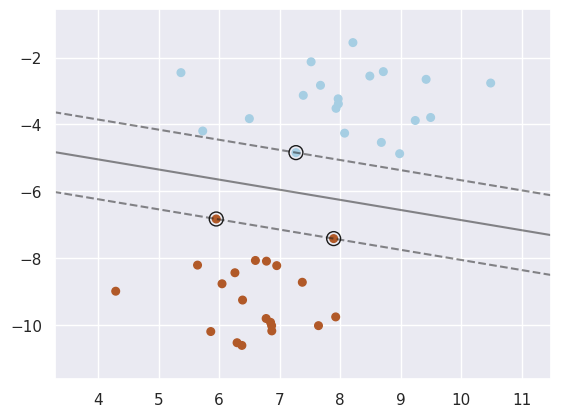

In [ ]:
# create sample train and test sample with 40 samples
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function dusing sklearn
# using level of -1 to 1 with lien style for svm classifier
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors with scatter to show the result
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [ ]:
# explain the concept of a maximum-margin hyperplane in your own words.
print("Maximum margin hyperplane is that group of points has the line and the nearest data points is referred to as the margin from group of maximized.")
print("From this, the best line that can separate the two classes of data is the line that is of the largest margin.")

Maximum margin hyperplane is that group of points has the line and the nearest data points is referred to as the margin from group of maximized.
From this, the best line that can separate the two classes of data is the line that is of the largest margin.


# 7
Use a linear SVM to construct a sentiment classifier using the Breast Cancer Wisconsin (Diagnostic) Data Set from the UCI Repository
a. 	Include all features and use them to construct a soft-margin linear SVM classifier using a standard hinge loss function. Using 10-fold cross-validation, what is this classifier’s accuracy?
b. 	Explain a hinge loss function in your own words
c. 	Use a non-linear kernel to generate classification results. What is this classifier’s accuracy? Is there another metric, besides accuracy, that would lead you to favor the classifier with the lower accuracy?

In [ ]:
path = "/content/drive/My Drive/EMSE6575/breast_cancer.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns = ['id'], axis = 1, inplace = True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


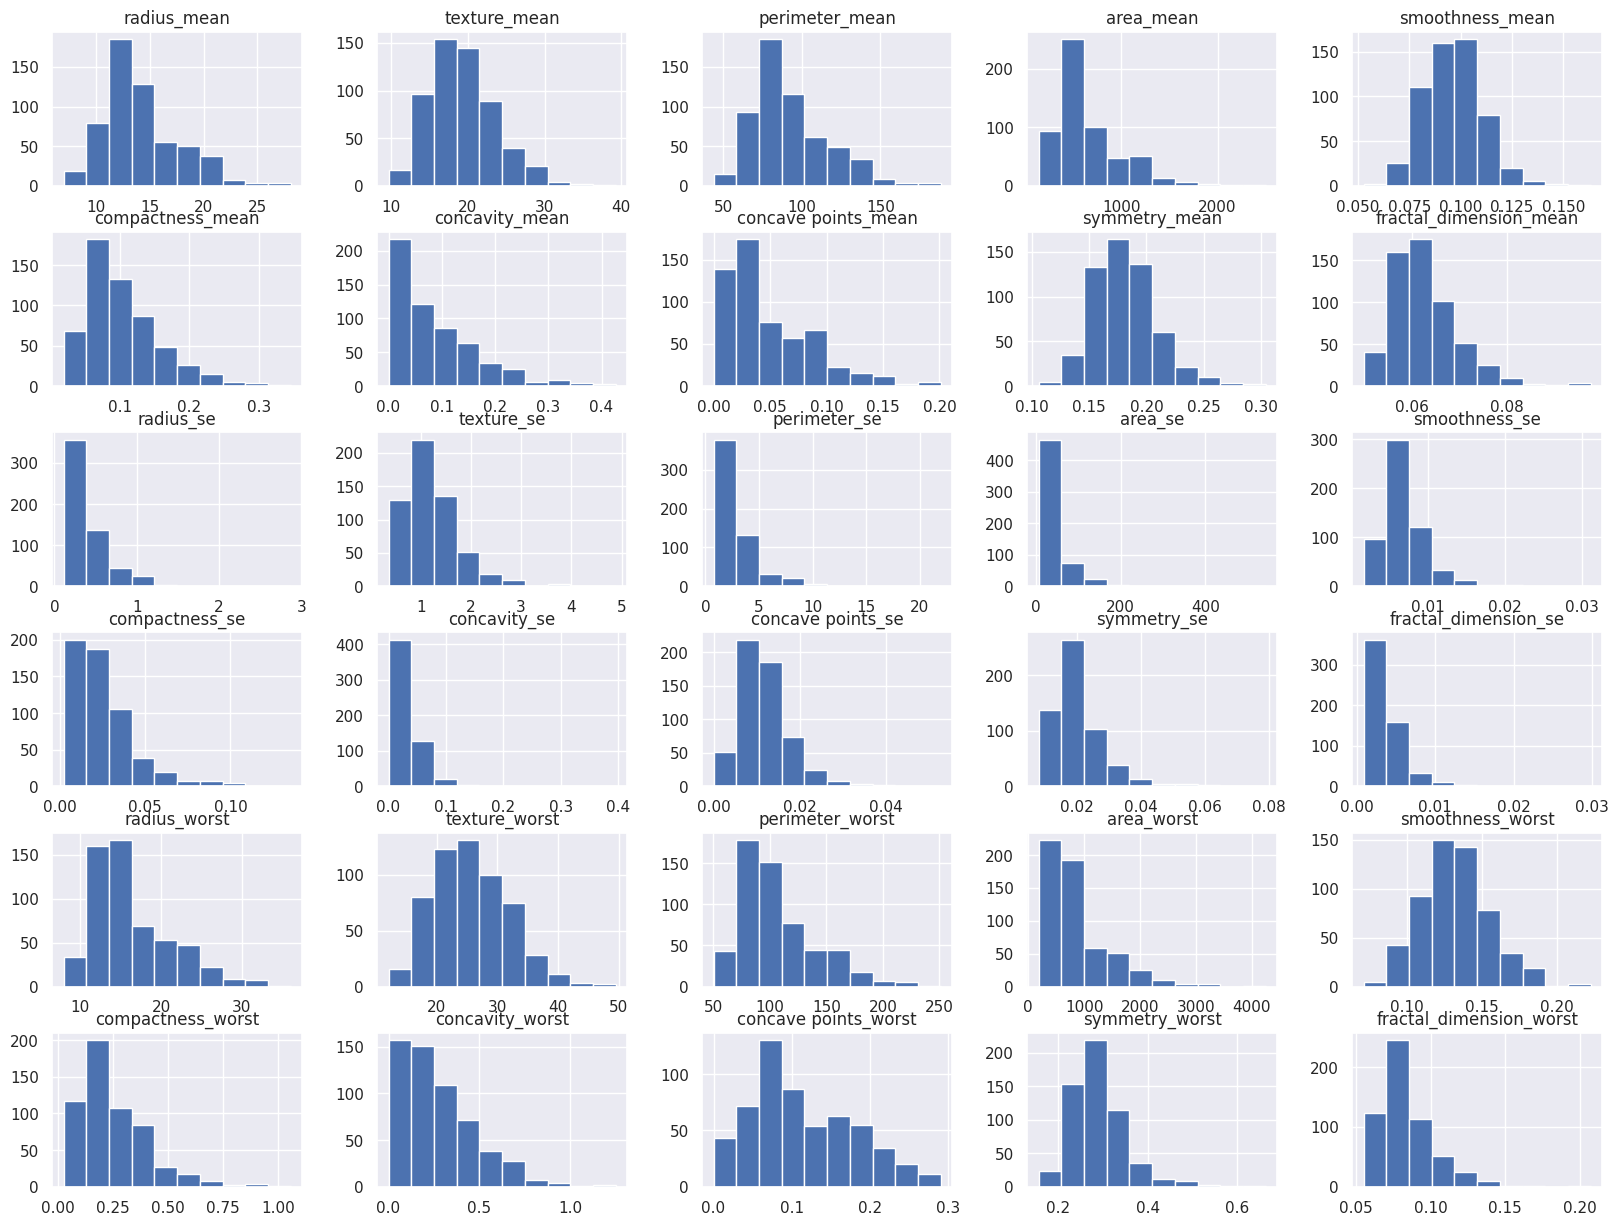

In [ ]:
df.hist(figsize = (20, 15))
plt.show()

In [ ]:
# prepare for modeling (correlation, etc)
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [ ]:
corr = df.corr()['diagnosis'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [ ]:
# drop useless columns
df = df.drop(columns = ['fractal_dimension_se', 'symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se'])

In [ ]:
# splitying data into train and test data
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42)

In [ ]:
# svm classification
svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

In [ ]:
# normalizing train data
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = (X_train_max- X_train_min)
X_train_scaled = (X_train - X_train_min) / (X_train_range)
X_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0.065527,0.257694,0.077323,0.034369,0.487226,0.417506,0.733365,0.217445,0.504004,0.078182,...,0.059645,0.283316,0.055971,0.025084,0.523195,0.449380,1.000000,0.601375,0.524936,0.529502
181,0.656203,0.570172,0.674207,0.489402,0.554934,0.903431,0.582709,0.743539,0.655633,0.187688,...,0.657920,0.571962,0.620253,0.462832,0.529308,0.802879,0.541534,0.997595,0.499310,0.621906
63,0.072579,0.140345,0.080239,0.038831,0.221901,0.233306,0.140300,0.108350,0.626802,0.108021,...,0.048681,0.192164,0.056428,0.021462,0.184677,0.154303,0.111581,0.174811,0.338459,0.253137
248,0.144914,0.524518,0.142908,0.075774,0.396678,0.181357,0.055740,0.080268,0.389749,0.050045,...,0.130546,0.617537,0.119414,0.057587,0.534742,0.123555,0.089856,0.210859,0.363493,0.224059
60,0.121407,0.174839,0.118296,0.060714,0.548614,0.209677,0.025398,0.064115,0.841431,0.146406,...,0.085593,0.144723,0.078135,0.035977,0.382599,0.078376,0.017316,0.088625,0.392667,0.213293


In [ ]:
# normalizing test data
X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = (X_test_max- X_test_min)
X_test_scaled = (X_test - X_test_min) / (X_test_range)


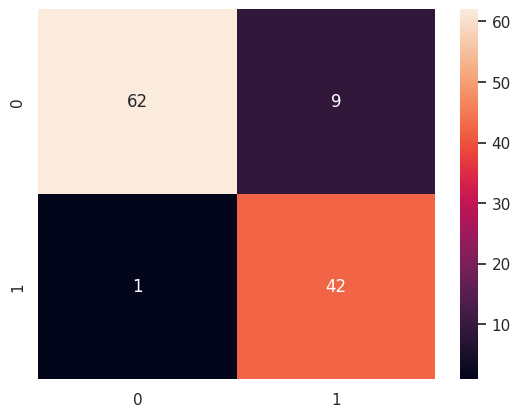

In [ ]:
svc_model.fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.ioff()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.93        71
           1       0.82      0.98      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
# Explain a hinge loss function in your own words
print("SVM modeling uses a hinge loss function for getting emphasis on the boundary points. The closest points are support vectors which the hinge also known as the max contributes to simplicity of the model.")

SVM modeling uses a hinge loss function for getting emphasis on the boundary points. The closest points are support vectors which the hinge also known as the max contributes to simplicity of the model.


# 8
Do the example classifications at http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
a. 	Comment each line of code, explaining its function
b. 	Explain the results of each of these outputs. How do they differ and why?
c. 	Explain the “kernel trick” in your own words

In [15]:
# import libraries for svm, plotting, and decision boundary modeling
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

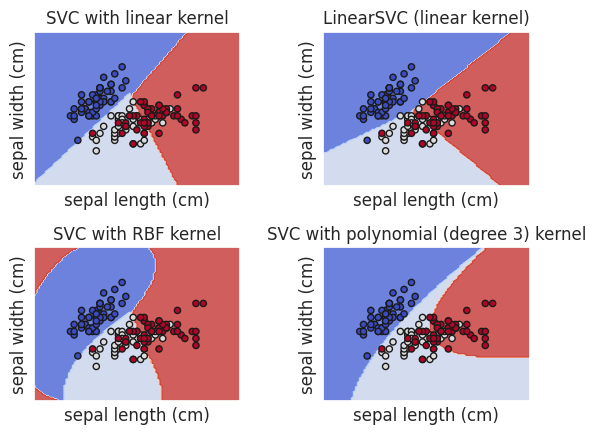

In [16]:
# import iris dataset for modeling
iris = datasets.load_iris()
# take two features of x and y as two dimensions dataset
X = iris.data[:, :2]
y = iris.target

# Creating instance of SVm and fit out the dataset, but not scaling our data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = ( # modeling svm
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# draw the graph for svc
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1] # matrix modeling

# function for modeling with prediction
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# display the plot
plt.show()

The results indicates that how sepal length Iris dataset clustered among different kernel to measure accuracy of the SVC modeling.
LinearSVC has most clustered 

In [ ]:
# Explain the results of each of these outputs, How do they differ and why? 
print("Linear kernel is the generalized techique of SVC kernel, and it offers more flexibility when dealing with a linearly inseparable classfication task. ")
print("While RBF kernel uses normal curves around the data points, and sums these points so that the decision boundary can be defined by a type of topology condition such as curves where the sum is above a value of 0.5.")

In [ ]:
# Explain the “kernel trick” in your own words
print("Kernel trick is to allow inner product of mapping function instead data points. It is to identify the kernel's function that indicates the inner product of mapping functions, and allow easy copmutation.")

# 9
Write out the loss functions of SVM, Naïve Bayes, and Logistic Regression.  Under what circumstances should each of these be used?

In [1]:
# loss function of SVM
print("SVM uses hinge loss function for its modeling. Under the circumstance of unstructure and semi structure data which get best margin distance between the line and the support vector that separates the classes and which reduce the risk of error on the data.")

SVM uses hinge loss function for its modeling. Under the circumstance of unstructure and semi structure data which get best margin distance between the line and the support vector that separates the classes and which reduce the risk of error on the data.


In [2]:
# Loss function of Naive Bayes 
print("Naive Bayes uses Bayes Theorem that using the conditional probability and priors. This is no other than by counting the times a feature value appears in sample of class, and total sample of class.")


Naive Bayes uses Bayes Theorem that using the conditional probability and priors. This is no other than by counting the times a feature value appears in sample of class, and total sample of class.


In [3]:
# Loss function of logistic regression
print("Logistic regression uses loss function of predictive analysis that explains the relationship between variables. It is applied to an input variable x where output variable y is a discrete value.")
print("It have different decision boundaries with different weights that are near the optimal point.")

Logistic regression uses loss function of predictive analysis that explains the relationship between variables. It is applied to an input variable x where output variable y is a discrete value.
It have different decision boundaries with different weights that are near the optimal point.
